## **To Explore Supervised Machine Learning**

In this task we will predict the percentage of marks that a student is expected to score from the given dataset.Here, we are going to use supervised machine learning algorithm,Linear Regression. Linear regression involves independent variable to make prediction.

## **Importing the libraries**

Pandas for dataframe usage and numpy for scientific,faster calculations on arrays.

In [33]:
import pandas as pd
import numpy as np

## **Importing the dataset into pandas dataframe**

Dataframe imported from url where dataset is present

In [34]:
url='https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'

#reading the dataset(in csv form) onto pandas dataframe 'df'
df=pd.read_csv(url)            

#displaying first 10 rows of dataframe 'df'
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [35]:
#checking datatypes of column
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [36]:
#statistical summary of the data
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## **Data Wrangling Operation**

In [37]:
#converting the datatype of column 'Scores' to 'float'
df['Scores']=df['Scores'].astype('float64')

In [38]:
#checking datatypes of columns
df.dtypes

Hours     float64
Scores    float64
dtype: object

##  **Data Analytics Operation**

In [39]:
#calculating correlation between columns 'Hours' and 'Scores'
df[['Hours','Scores']].corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [40]:
print('Large positive correlation val ->>0.976')

Large positive correlation val ->>0.976


<b>Calculating the p-value using Pearson correlation</b>

p-value gives idea how certain we are about the correlation

In [41]:
#importing scipy.stats library
import scipy.stats as Scipy

In [42]:
coeff,p=Scipy.pearsonr(df['Hours'],df['Scores'])

In [43]:
print('Correlation coefficient ->>',coeff,' p-value ->>',p)

Correlation coefficient ->> 0.9761906560220884  p-value ->> 9.132624467460325e-17


In [44]:
print('High certainity in result for given dataset as only p-value<<<<0.1 ')

High certainity in result for given dataset as only p-value<<<<0.1 


## **Visualizing the correlation**

In [45]:
#importing matplot library
import matplotlib.pyplot as plt
%matplotlib inline

<b>Scatter Plot</b>

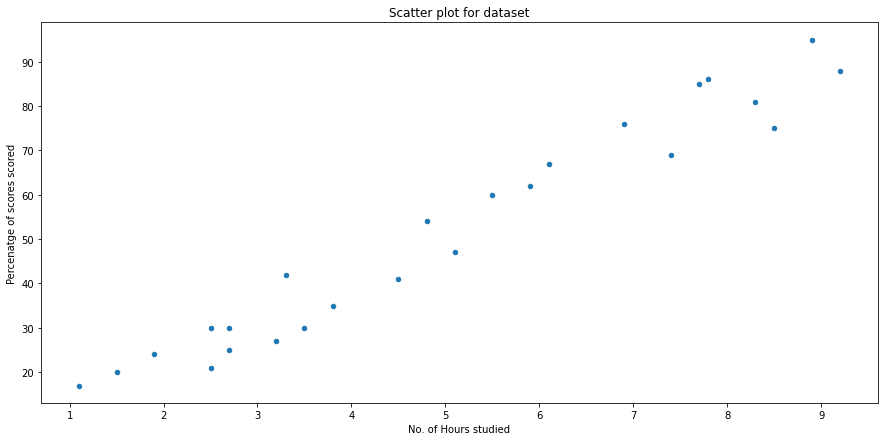

In [46]:
#Generating Scatter for visualizing the correlation
df.plot(kind='scatter',x='Hours',y='Scores',figsize=(15,7))
plt.title('Scatter plot for dataset')
plt.xlabel('No. of Hours studied')
plt.ylabel('Percenatge of scores scored')
plt.show()

<b>Box plot</b>

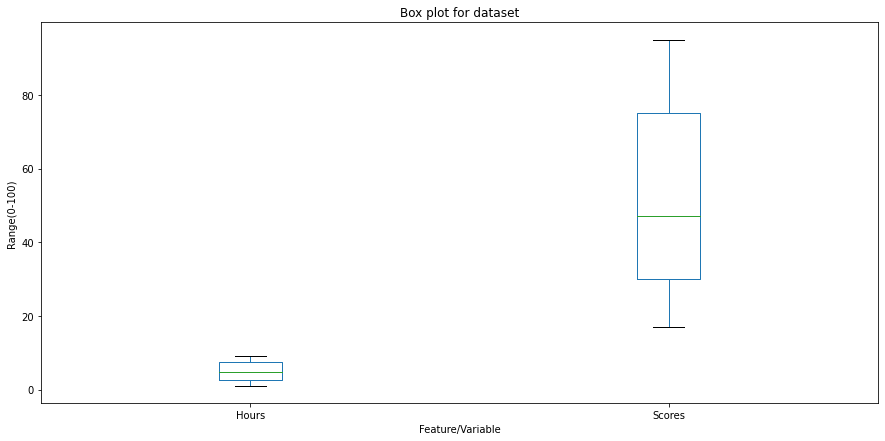

In [47]:
df.plot(kind='box',figsize=(15,7))
plt.title('Box plot for dataset')
plt.xlabel('Feature/Variable')
plt.ylabel('Range(0-100)')
plt.show()

In [48]:
print('From box plot we can conclude there are no outliers')

From box plot we can conclude there are no outliers


## **Model Devlopement**

Simple Linear Regression to be used as only one independent and one dependent variable are present.

<b>Model Creation and Training</b>

In [49]:
#importing required libraries
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [50]:
x=df[['Hours']]
y=df[['Scores']]
#linear regression object creator
lm=LinearRegression()
#fitting the model for x(independent variable) and y(dependent variable)
lm.fit(x,y)

LinearRegression()

<b>Making Predictions</b>

In [51]:
#Predicting the value
yval=lm.predict([[9.25]])
print('Predicted score if he studied for 9.25 hours ->>',yval)

Predicted score if he studied for 9.25 hours ->> [[92.90985477]]


In [52]:
print('Function->>>Scores=',lm.coef_,'* Hours + ',lm.intercept_)

Function->>>Scores= [[9.77580339]] * Hours +  [2.48367341]


<b>Evaluating the Model</b>

<b>1.Using Visualization</b>

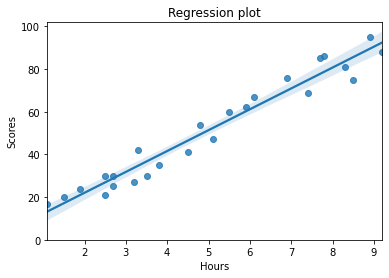

In [53]:
#Regression plot
sns.regplot(x=df[['Hours']],y=df[['Scores']],data=df)
plt.ylim(0,)
plt.title('Regression plot')
plt.show()

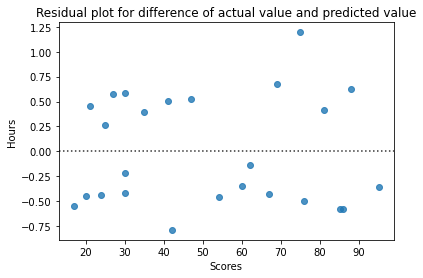

In [54]:
#Residual plot
sns.residplot(df[['Scores']],df[['Hours']])
plt.title('Residual plot for difference of actual value and predicted value')
plt.show()

In [55]:
print('As there is equal distribution of value so, model is okay')

As there is equal distribution of value so, model is okay


<b>2.Measures using in-sample evaluation metrics</b>

In [56]:
#Mean Squared Error
#importing required libraries
from sklearn.metrics import mean_squared_error
yval=lm.predict(x)
print('Mean Squared Error ->>',mean_squared_error(df[['Scores']],yval))

Mean Squared Error ->> 28.88273050924546


In [57]:
#R^2 value
print('R^2 value ->>',lm.score(x,y))
print('We can conclude MSE value is high for model(should be low)and R^2 is also high(okay), so we need to increase the efficiency of model')

R^2 value ->> 0.9529481969048356
We can conclude MSE value is high for model(should be low)and R^2 is also high(okay), so we need to increase the efficiency of model


## **Model Refinement -Part 1**

<b>1.Splitting the data into train and test data</b>

In [95]:
#importing required libraries
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)
lm.fit(xtrain,ytrain)
ypred=lm.predict(xtest)
ypred

array([[17.05366541],
       [33.69422878],
       [74.80620886],
       [26.8422321 ],
       [60.12335883],
       [39.56736879],
       [20.96909209],
       [78.72163554]])

In [96]:
# Comparing Actual vs Predicted
print(ytest[['Scores']])

    Scores
5     20.0
2     27.0
19    69.0
16    30.0
11    62.0
22    35.0
17    24.0
24    86.0


2.<b>Evaluating the model with metrics and visualization</b>

Mean Squared Error ->> 22.96509721270043
R^2 value ->> 0.9568211104435257


Text(0, 0.5, 'Predicted Value')

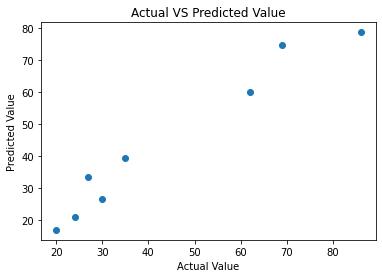

In [99]:
#Mean Squared Value
print('Mean Squared Error ->>',mean_squared_error(ytest,ypred))
#R^2 value
print('R^2 value ->>',lm.score(xtest,ytest))
plt.scatter(ytest,ypred)
plt.title('Actual VS Predicted Value')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

## **Model Refinement -Part 2**

<b>1.Using cross-validation</b>

In [114]:
#importing required libraries
from sklearn.model_selection import cross_val_score,cross_val_predict
lm1=LinearRegression()
scores=cross_val_score(lm1,xtrain,ytrain,cv=3)
print('Cross validation scores ->>',scores)
#R^2 values
print('Mean score(R^2 value) ->>',np.mean(scores))

Cross validation scores ->> [0.92795299 0.96129062 0.92347275]
Mean score(R^2 value) ->> 0.9375721183131133


In [115]:
ypredic=cross_val_predict(lm1,xtest,ytest,cv=3)
#Mean Squared Value
print('Mean Squared Error ->>',mean_squared_error(ytest,ypredic))

Mean Squared Error ->> 45.25883620063454


In [116]:
print('So, we can conclude model ->lm is a better model and can be used for prediction')

So, we can conclude model ->lm is a better model and can be used for prediction


## **Prediction**

In [117]:
score=lm.predict([[9.25]])
print('Percentage scored when student studies for 9.25 hours ->>',score)

Percentage scored when student studies for 9.25 hours ->> [[92.91505723]]
